#### Figure S4 in Mahdavi & Siegel (2020) AS&T
The figure is in the supplemental information (SI).

This figure aims to illustrate minimal differences between the sprinkled dust over a filter and the loaded dust from the loading procedure.

Plot type: Line plot.

In [2]:
from matplotlib import pyplot as plt
from matplotlib import container
import pandas as pd
import numpy as np

In [4]:
df = pd.read_excel(r'MS_extraction_evaluation_016_180405_am.xlsx', sheet_name = 'Outcome')

# calculating the error bar magnitudes
df['Unnamed: 5'] = (df['Max,STD'] - df['Min,STD'])/2
df['Unnamed: 13'] = (df['Max,STD'] - df['Min,STD'])/2

df.rename(columns={'Unnamed: 5': 'Error_STD',
                   'Unnamed: 13': 'Error_FG'}, inplace = True)

# errors from combination of two parameters summed up
df['Error_filter'] = np.sqrt(df['Error_STD'].pow(2) + df['Error_FG'].pow(2))

df.loc[df['Filter'] < 0, 'Filter'] = 0 # getting rid of negative values due to back calculation of bad data due to small values


In [9]:
df[['Particle Size', 'STD', 'Filter', 'Error_STD', 'Error_FG', 'Error_filter']].iloc[14:,:].head() 
# from 14th index shown where psd starts to rise

,Particle Size,STD,Filter,Error_STD,Error_FG,Error_filter
14,0.501,0.090,0.097629,0.000,0.000,0.000000
15,0.562,0.292,0.312343,0.005,0.005,0.007071
16,0.631,0.608,0.652755,0.005,0.005,0.007071
17,0.708,0.922,0.991167,0.005,0.005,0.007071
18,0.794,1.192,1.284053,0.005,0.005,0.007071


Text(0.5, 4.5, 'n = 1')

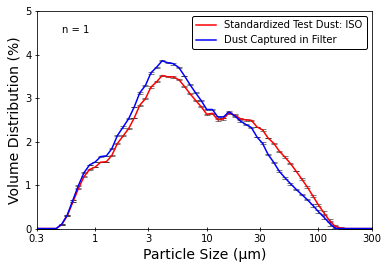

In [10]:
plt.figure()
plt.errorbar(df['Particle Size'], df['STD'],
             yerr = [df['Error_STD'], df['Error_STD']],
             xerr = None,
             capsize = 3, c = "r", ecolor = 'k', elinewidth = 0.5, capthick = 0.5,
             label = 'Standardized Test Dust: ISO')
 
plt.errorbar(df['Particle Size'], df['Filter'],
             yerr = [df['Error_filter'], df['Error_filter']],
             xerr = None,
             capsize = 3, c = "b", ecolor = 'k', elinewidth = 0.5, capthick = 0.5,
             label = 'Dust Captured in Filter')

plt.xscale('log')

plt.xlim(0.3, 300)
a = [0.3, 1, 3, 10, 30, 100, 300]
plt.xticks(ticks = a, labels = a)
plt.minorticks_off()
plt.xlabel('Particle Size (µm)', size = 14)

plt.ylim(0, 5)
plt.yticks(np.arange(0, 6, step=1))
plt.ylabel('Volume Distribution (%)', size = 14)

plt.tick_params(axis = 'both', direction = 'inout')

ax = plt.gca()

handles, labels = ax.get_legend_handles_labels()

new_handles = []

for h in handles:
    #only need to edit the errorbar legend entries
    if isinstance(h, container.ErrorbarContainer):
        new_handles.append(h[0])
    else:
        new_handles.append(h)

ax.legend(new_handles, labels, loc = 1, frameon = True, edgecolor = 'black', framealpha=1)
plt.text(0.5, 4.5, 'n = 1')


End of code